###**Import Important Libraries**

In [324]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###**Load the Dataset**

In [325]:
df = pd.read_csv("https://raw.githubusercontent.com/abhifg/Carbon-Emission-Forecasting/main/Data.csv")
df.head()

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,CLEIEUS,197301,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1,CLEIEUS,197302,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
2,CLEIEUS,197303,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
3,CLEIEUS,197304,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
4,CLEIEUS,197305,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094 entries, 0 to 5093
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSN           5094 non-null   object
 1   YYYYMM        5094 non-null   int64 
 2   Value         5094 non-null   object
 3   Column_Order  5094 non-null   int64 
 4   Description   5094 non-null   object
 5   Unit          5094 non-null   object
dtypes: int64(2), object(4)
memory usage: 238.9+ KB


In [327]:
dateparse = lambda x: pd.to_datetime(x, format='%Y%m', errors = 'coerce')
df = pd.read_csv("https://raw.githubusercontent.com/abhifg/Carbon-Emission-Forecasting/main/Data.csv", parse_dates=['YYYYMM'], index_col='YYYYMM', date_parser=dateparse) 
df.head()

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [328]:
df.isnull().sum()

MSN             0
Value           0
Column_Order    0
Description     0
Unit            0
dtype: int64

In [329]:
df.dtypes

MSN             object
Value           object
Column_Order     int64
Description     object
Unit            object
dtype: object

In [330]:
ts = df[pd.Series(pd.to_datetime(df.index, errors='coerce')).notnull().values]
ts.head(10)

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-06-01,CLEIEUS,66.538,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-07-01,CLEIEUS,72.626,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-08-01,CLEIEUS,75.181,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-09-01,CLEIEUS,68.397,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [331]:
ts.dtypes

MSN             object
Value           object
Column_Order     int64
Description     object
Unit            object
dtype: object

In [332]:
ts['Value']=pd.to_numeric(ts['Value'],errors='coerce')
ts.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [333]:
ts.isnull().sum()

MSN               0
Value           384
Column_Order      0
Description       0
Unit              0
dtype: int64

In [334]:
ts.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [335]:
energy_source=ts.groupby('Description')
energy_source.head()

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-01-01,NNEIEUS,12.175,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,NNEIEUS,11.708,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,NNEIEUS,13.994,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,NNEIEUS,14.627,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


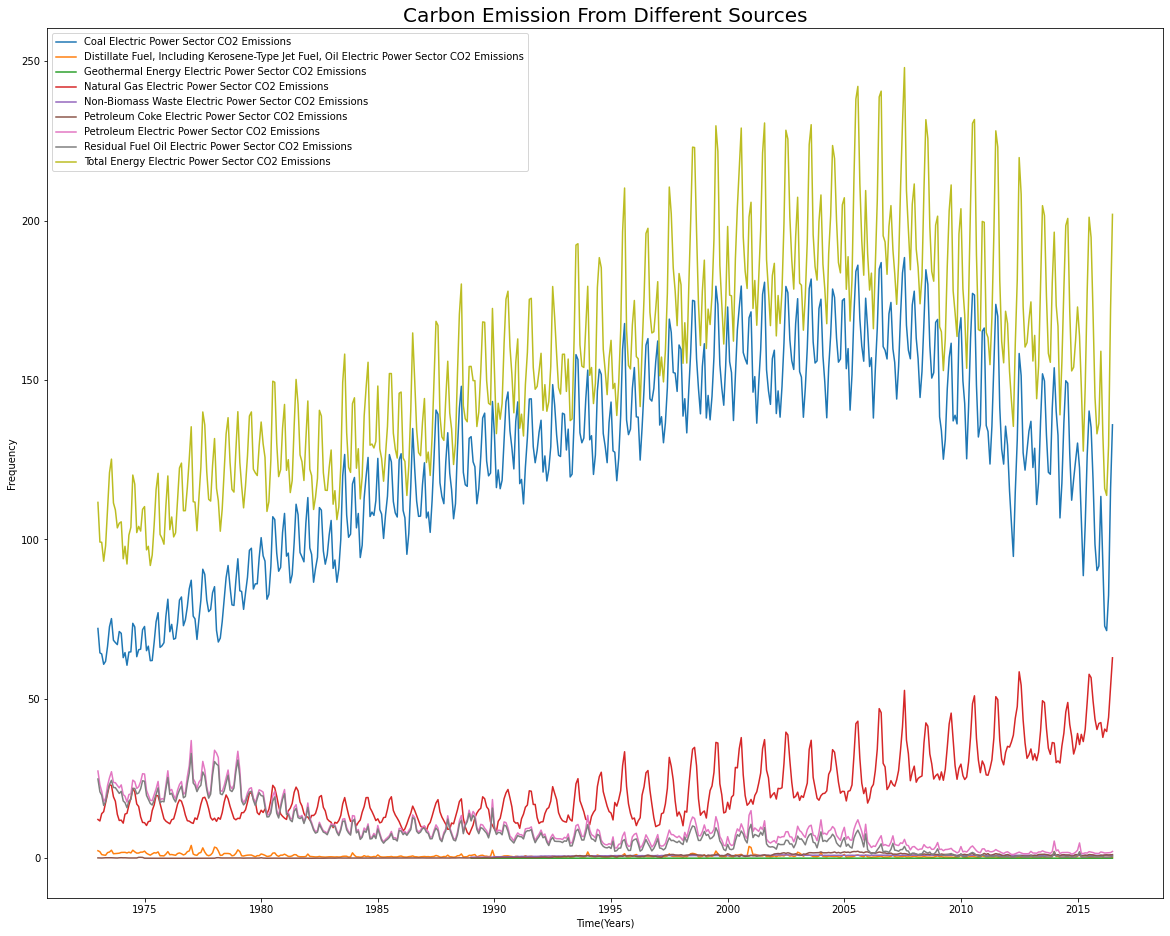

In [336]:
plt.figure(figsize=(20,16))
for desc,group in energy_source:
  plt.plot(group.index,group['Value'],label=desc)
plt.xlabel('Time(Years)')
plt.ylabel('Frequency')
plt.title('Carbon Emission From Different Sources',fontsize=20)
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.,
        80000., 90000.]), <a list of 10 Text major ticklabel objects>)

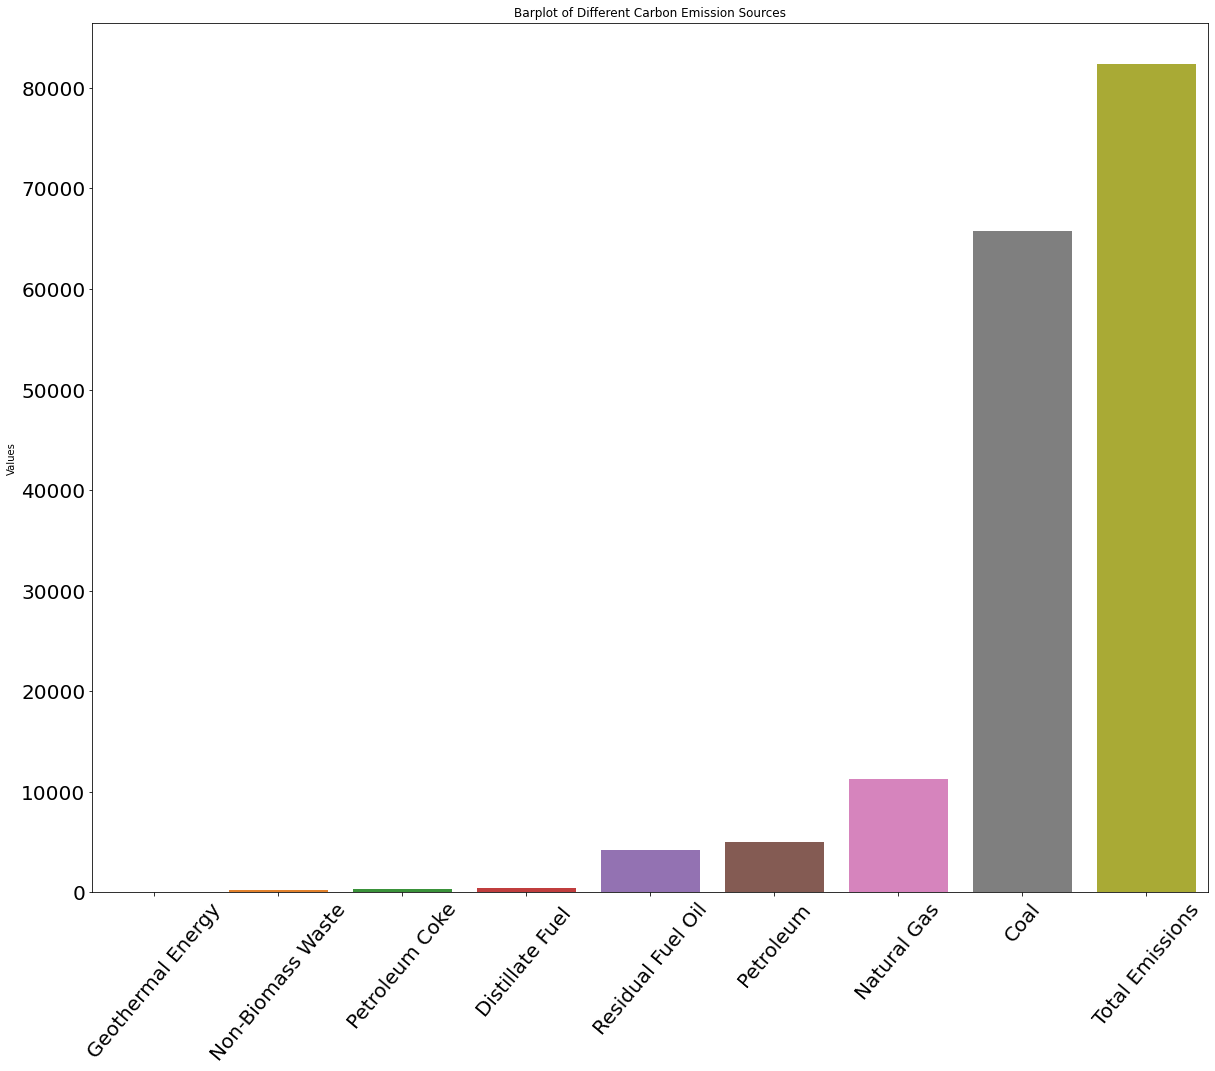

In [337]:
plt.figure(figsize=(20,16))
cols = ['Geothermal Energy', 'Non-Biomass Waste', 'Petroleum Coke','Distillate Fuel ',
        'Residual Fuel Oil', 'Petroleum', 'Natural Gas', 'Coal', 'Total Emissions']
co2emission=ts.groupby('Description')['Value'].sum().sort_values()
x_labels=cols
x_tick=np.arange(len(cols))
sns.barplot(x_tick,co2emission)
plt.ylabel('Values')
plt.title('Barplot of Different Carbon Emission Sources')
plt.xticks(x_tick,cols,rotation=50,fontsize=20)
plt.yticks(fontsize=20)

For developing the time series model and make forcasting, we will use the natural gas CO2 emission from the electrical power generetion.

In [338]:
emission=ts.iloc[:,1:]
emission=emission.groupby(['Description',pd.Grouper(freq='M')])['Value'].sum().unstack(level=0)
emission

Description,Coal Electric Power Sector CO2 Emissions,"Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions",Geothermal Energy Electric Power Sector CO2 Emissions,Natural Gas Electric Power Sector CO2 Emissions,Non-Biomass Waste Electric Power Sector CO2 Emissions,Petroleum Coke Electric Power Sector CO2 Emissions,Petroleum Electric Power Sector CO2 Emissions,Residual Fuel Oil Electric Power Sector CO2 Emissions,Total Energy Electric Power Sector CO2 Emissions
YYYYMM,,,,,,,,,
1973-01-31,72.076,2.375,NaN,12.175,NaN,0.128,27.369,24.867,111.621
1973-02-28,64.442,2.061,NaN,11.708,NaN,0.106,23.034,20.867,99.185
1973-03-31,64.084,1.171,NaN,13.994,NaN,0.083,21.034,19.780,99.112
1973-04-30,60.842,1.022,NaN,14.627,NaN,0.130,17.714,16.562,93.183
1973-05-31,61.798,0.949,NaN,17.344,NaN,0.167,18.870,17.754,98.012
...,...,...,...,...,...,...,...,...,...
2016-03-31,72.840,0.279,0.035,40.525,0.943,1.041,1.654,0.334,115.997
2016-04-30,71.410,0.259,0.034,39.763,0.912,1.096,1.695,0.340,113.815
2016-05-31,82.510,0.340,0.035,44.210,0.943,1.035,1.743,0.368,129.440


In [339]:
mte=emission['Natural Gas Electric Power Sector CO2 Emissions']
mte.head()

YYYYMM
1973-01-31    12.175
1973-02-28    11.708
1973-03-31    13.994
1973-04-30    14.627
1973-05-31    17.344
Freq: M, Name: Natural Gas Electric Power Sector CO2 Emissions, dtype: float64

In [340]:
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

Text(0.5, 1.0, 'Monthly Total Emission of CO2 From Natural Gas')

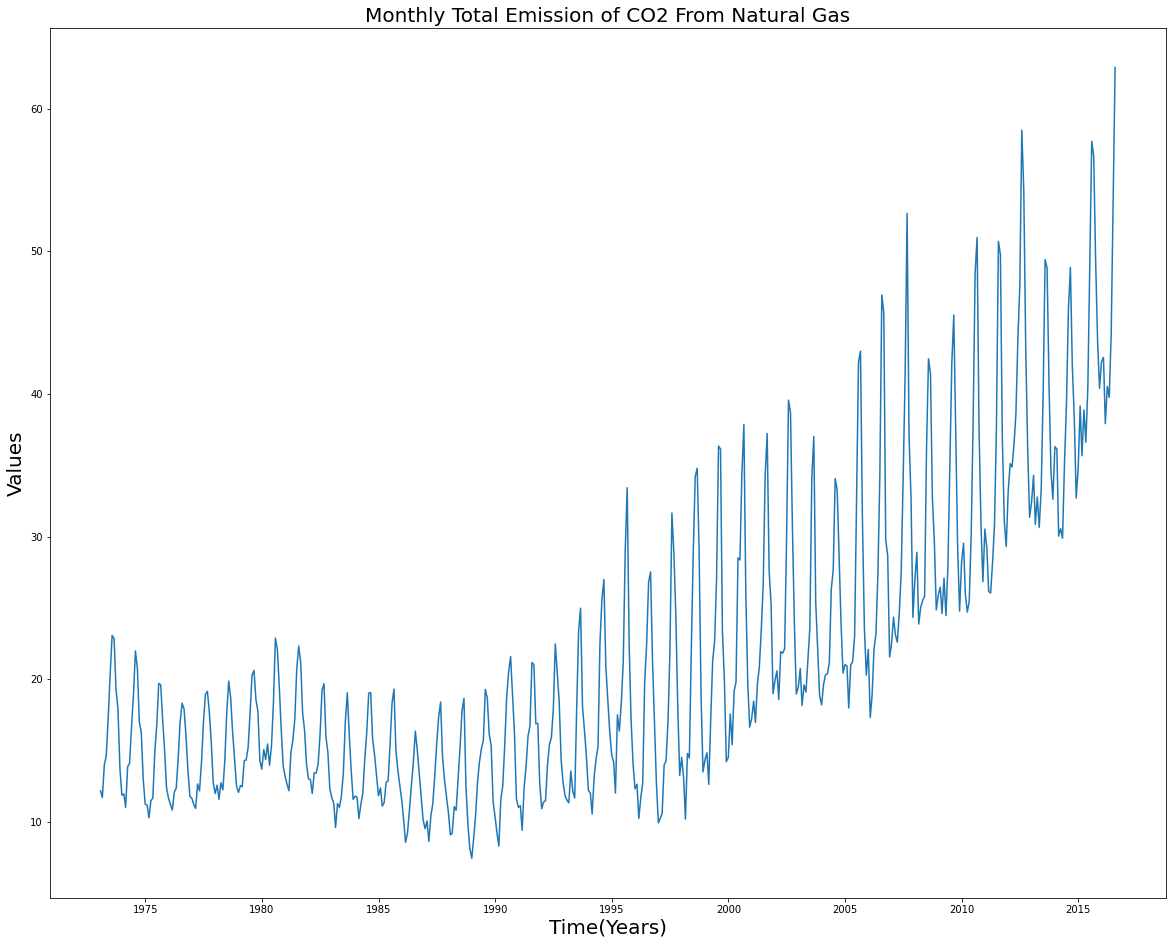

In [341]:

plt.figure(figsize=(20,16))
plt.plot(mte)
plt.xlabel('Time(Years)',fontsize=20)
plt.ylabel('Values',fontsize=20)
plt.title('Monthly Total Emission of CO2 From Natural Gas',fontsize=20)

As We can see from the graph that the data is not stationary, so first we have to make the data stationary for future predictions

###**Dickey Fuller Test**

In [342]:
def adf_test(series):  
  result=adfuller(series)
  print('ADF Statistics: %f'%result[0])
  print('P value: %f'%result[1])
  for key,values in result[4].items():
    print(key,values)
  if result[0] < result[4]["5%"]:
      print("At 5% level of significance - Reject Null Hypothesis - Time series is stationary")
  else:
      print("At 5% level of significance - Failed to reject Null Hypothesis - Time series is non-stationary")

In [343]:
adf_test(mte)

ADF Statistics: 1.831215
P value: 0.998409
1% -3.4434175660489905
5% -2.8673031724657454
10% -2.5698395516760275
At 5% level of significance - Failed to reject Null Hypothesis - Time series is non-stationary


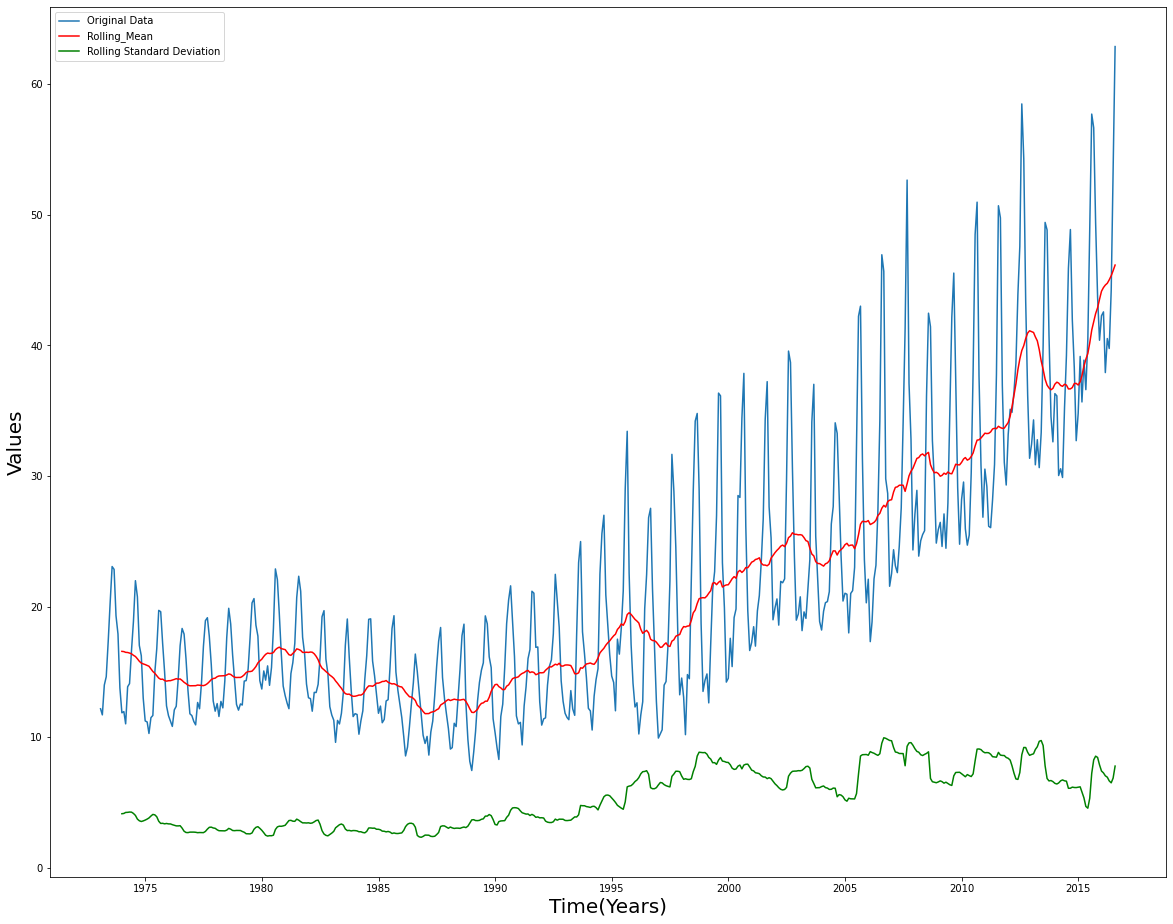

In [344]:
rolling_mean=mte.rolling(12).mean()
rolling_std=mte.rolling(12).std()
plt.figure(figsize=(20,16))
plt.plot(mte,label='Original Data')
plt.plot(rolling_mean,color='red',label='Rolling_Mean')
plt.plot(rolling_std,color='green',label='Rolling Standard Deviation')
plt.xlabel('Time(Years)',fontsize=20)
plt.ylabel('Values',fontsize=20)
plt.legend()
plt.show()

###**Moving Average**

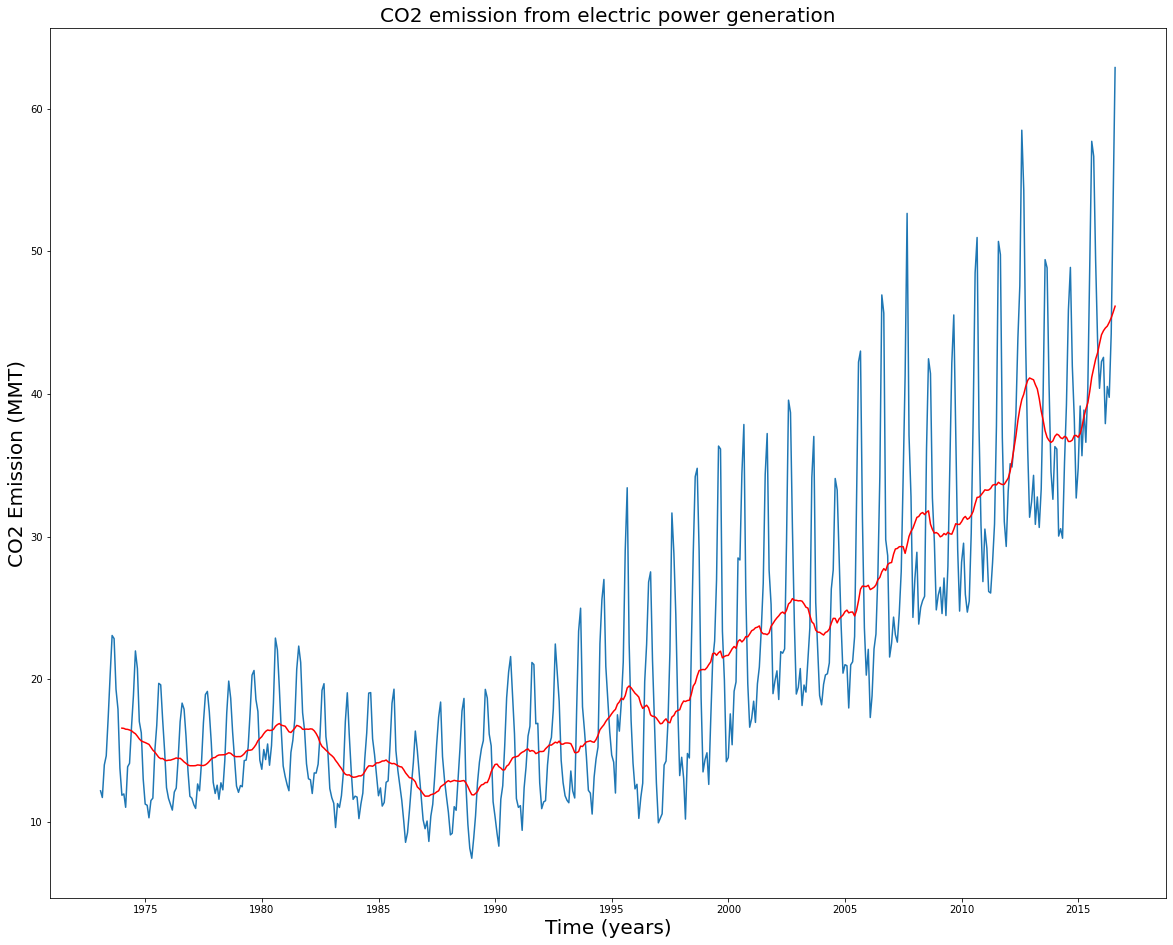

In [345]:
moving_avg = mte.rolling(12).mean()
plt.figure(figsize=(20,16))
plt.plot(mte)
plt.plot(moving_avg, color='red')
plt.xlabel('Time (years)', fontsize = 20)
plt.ylabel('CO2 Emission (MMT)', fontsize = 20)
plt.title('CO2 emission from electric power generation', fontsize = 20)
plt.show()

###**Removing Trend and Seasonality by Differencing**

In [346]:
mte_first_diff=mte-mte.shift(1)
mte_first_diff.head(10)

YYYYMM
1973-01-31      NaN
1973-02-28   -0.467
1973-03-31    2.286
1973-04-30    0.633
1973-05-31    2.717
1973-06-30    2.921
1973-07-31    2.802
1973-08-31   -0.217
1973-09-30   -3.553
1973-10-31   -1.400
Freq: M, Name: Natural Gas Electric Power Sector CO2 Emissions, dtype: float64

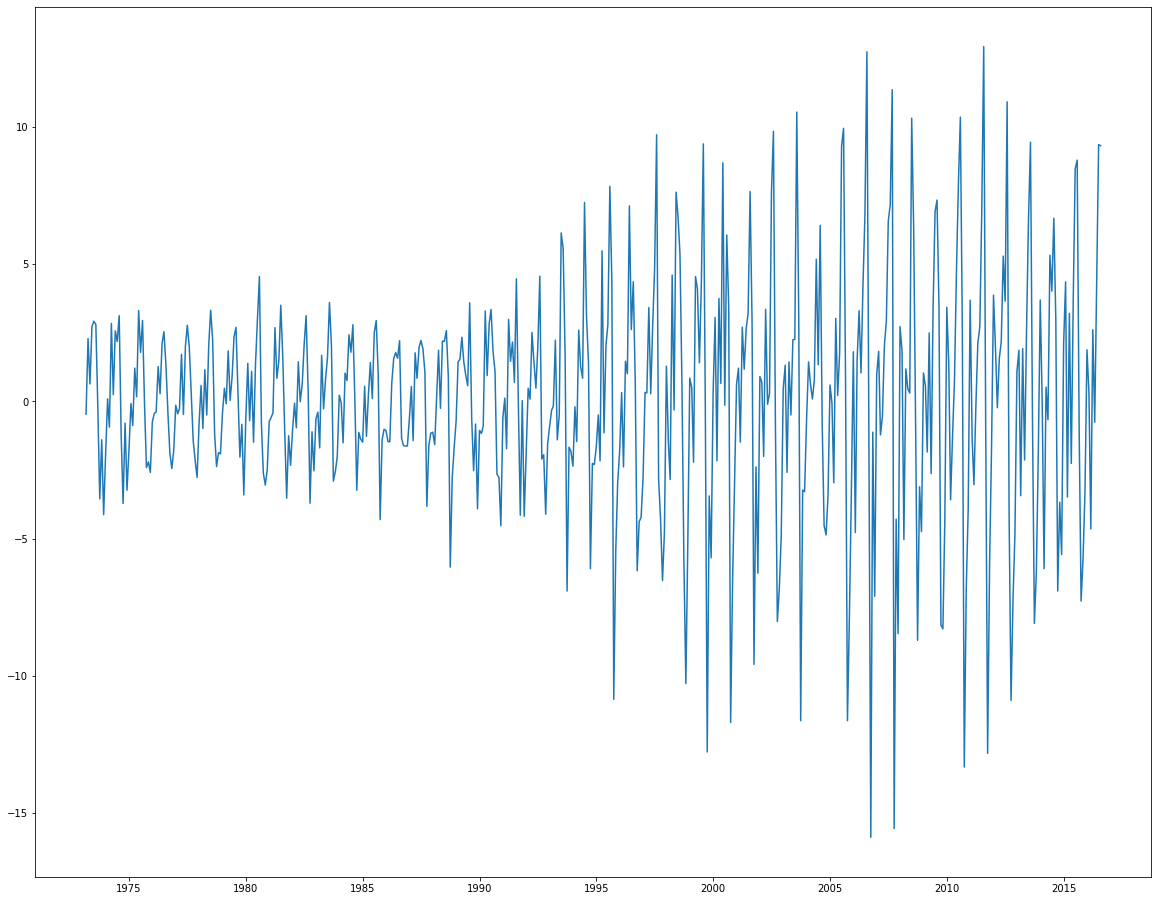

In [347]:
plt.figure(figsize=(20,16))
plt.plot(mte_first_diff.dropna(inplace=False))


In [348]:
adf_test(mte_first_diff.dropna(inplace=False))

ADF Statistics: -5.435116
P value: 0.000003
1% -3.4434175660489905
5% -2.8673031724657454
10% -2.5698395516760275
At 5% level of significance - Reject Null Hypothesis - Time series is stationary


###**Removing Seasonality**

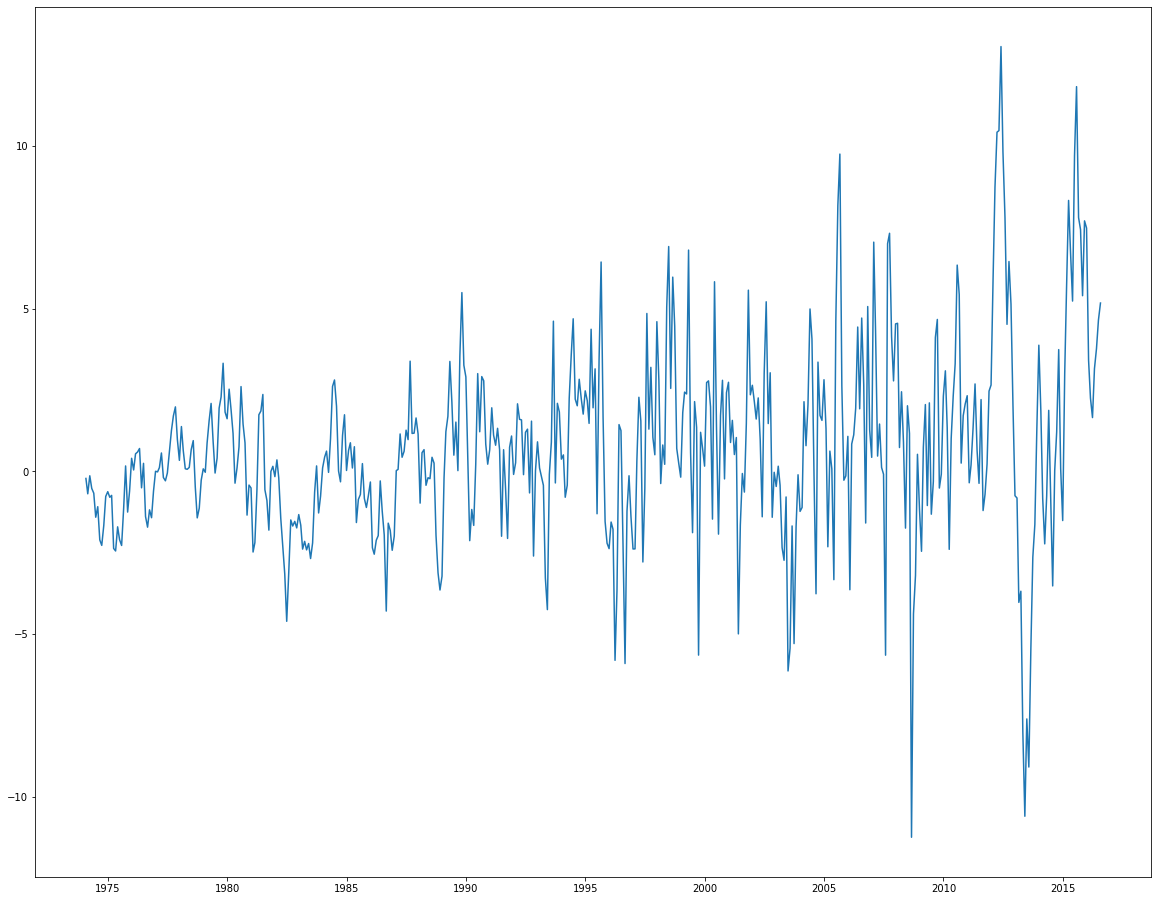

In [349]:
mte_seasonal_diff=mte-mte.shift(12)
plt.figure(figsize=(20,16))
plt.plot(mte_seasonal_diff.dropna(inplace=False))

In [350]:
adf_test(mte_seasonal_diff.dropna(inplace=False))

ADF Statistics: -4.412396
P value: 0.000282
1% -3.4435761493506294
5% -2.867372960189225
10% -2.5698767442886696
At 5% level of significance - Reject Null Hypothesis - Time series is stationary


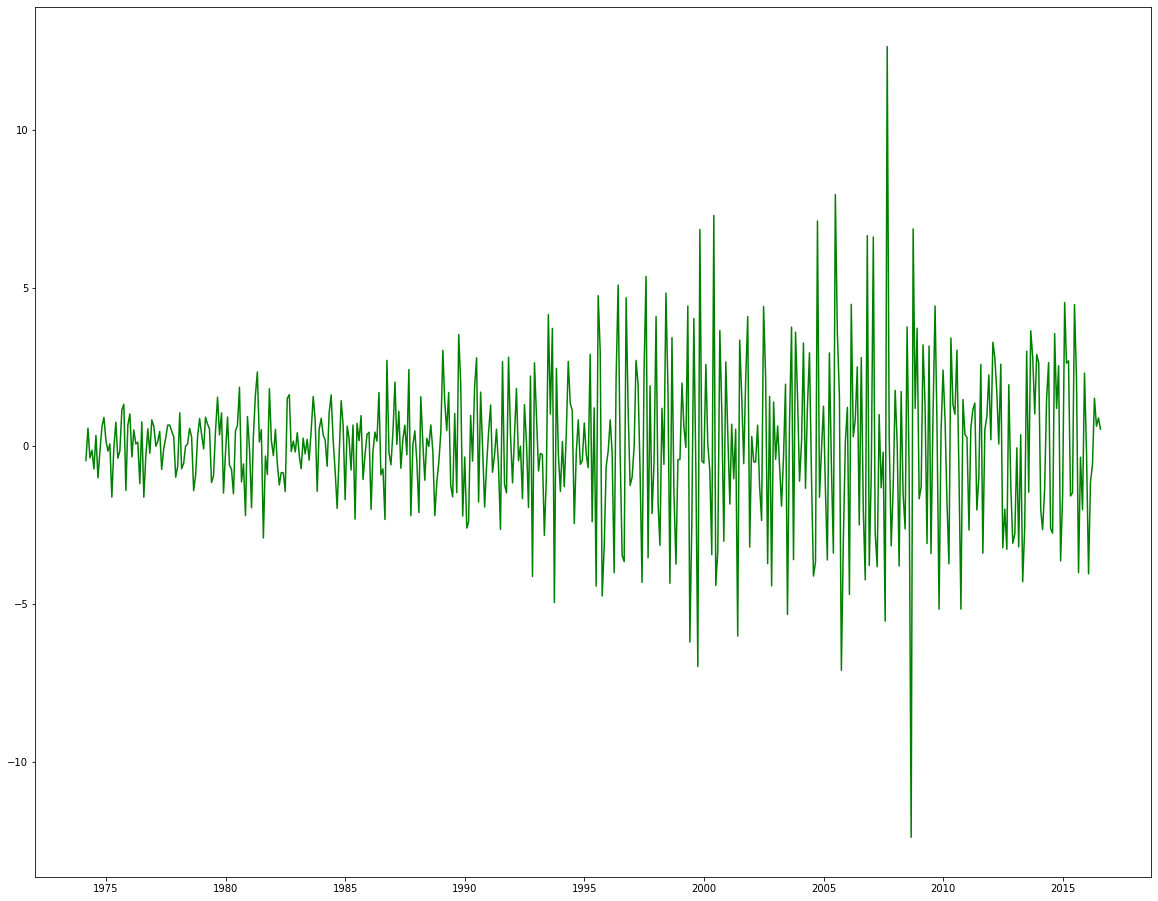

In [351]:
mte_seasonal_first_diff = mte_first_diff - mte_first_diff.shift(12)
plt.figure(figsize=(20,16))
plt.plot(mte_seasonal_first_diff.dropna(inplace=False),color='green')

In [352]:
adf_test(mte_seasonal_first_diff.dropna(inplace=False))

ADF Statistics: -10.097432
P value: 0.000000
1% -3.4435761493506294
5% -2.867372960189225
10% -2.5698767442886696
At 5% level of significance - Reject Null Hypothesis - Time series is stationary


###**ACF and PACF Plot**

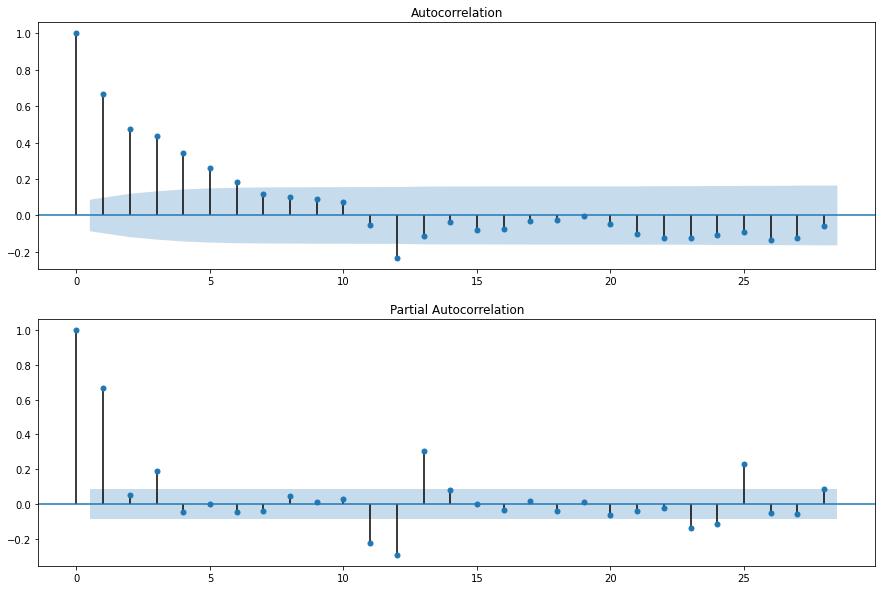

In [353]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig = plt.figure(figsize = (15,10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(mte_seasonal_diff.dropna(), ax = ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(mte_seasonal_diff.dropna(), ax = ax2)


###**Model Building**

In [354]:
mod = sm.tsa.statespace.SARIMAX(mte, 
                                order=(1,1,1), 
                                seasonal_order=(0,1,1,12),   
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())


                                          Statespace Model Results                                         
Dep. Variable:     Natural Gas Electric Power Sector CO2 Emissions   No. Observations:                  523
Model:                              SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -997.777
Date:                                             Sat, 18 Jun 2022   AIC                           2003.553
Time:                                                     14:43:47   BIC                           2020.380
Sample:                                                 01-31-1973   HQIC                          2010.158
                                                      - 07-31-2016                                         
Covariance Type:                                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------

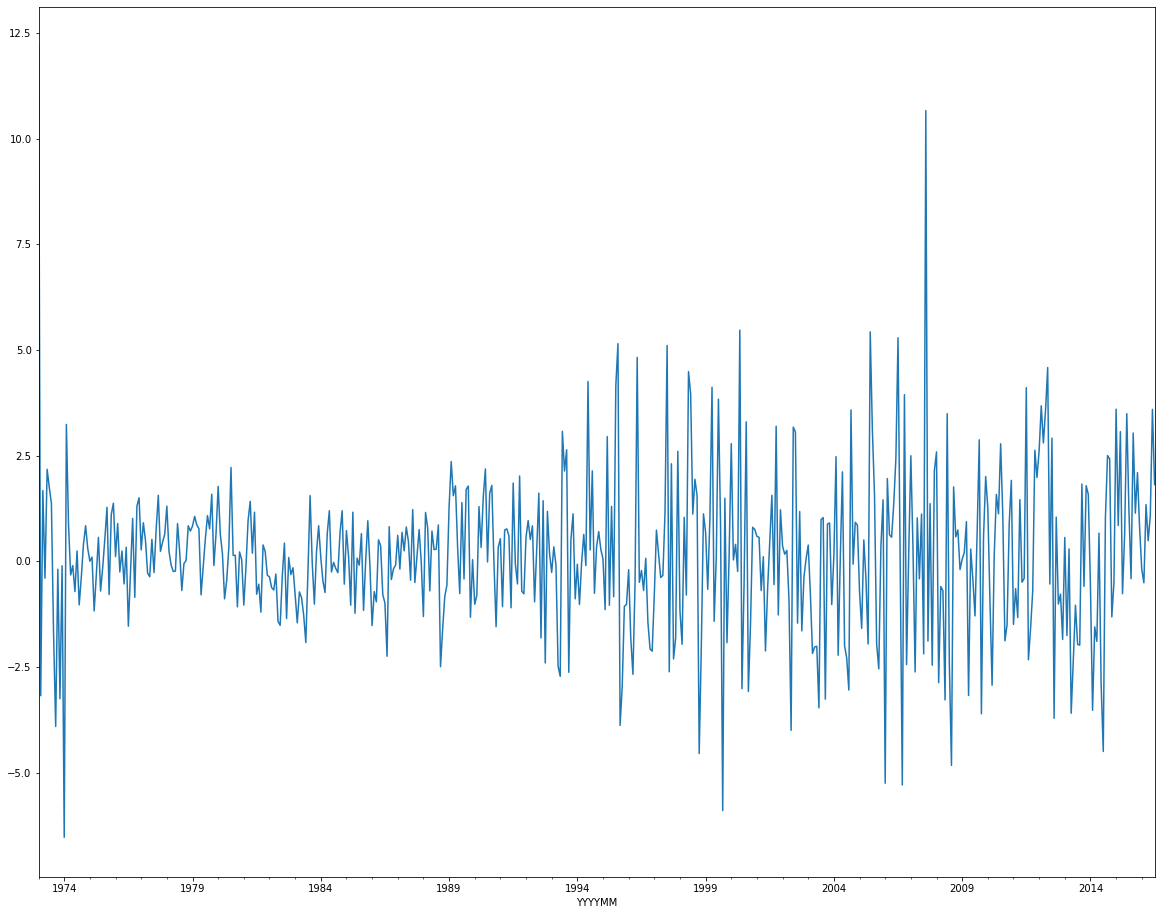

In [355]:
plt.figure(figsize=(20,16))
results.resid.plot()

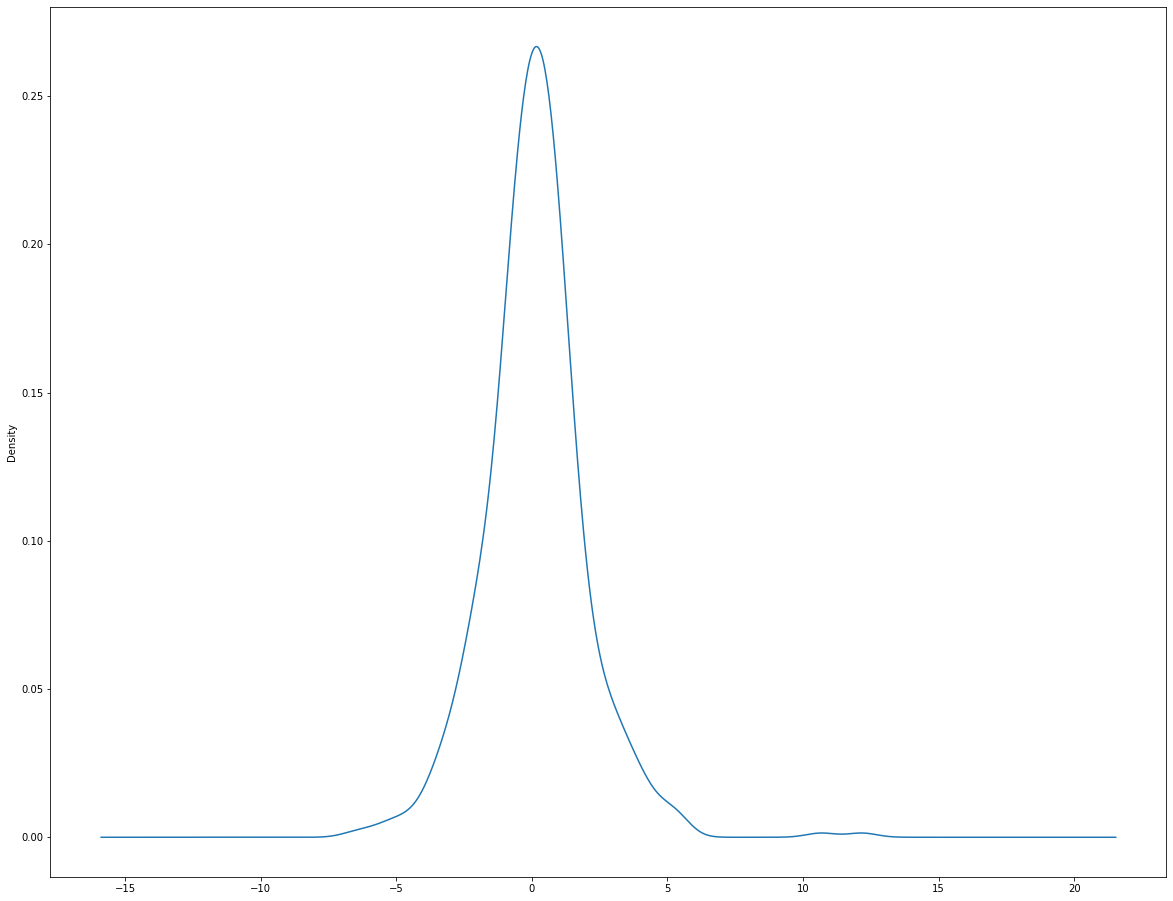

In [356]:
plt.figure(figsize=(20,16))
results.resid.plot(kind='kde')


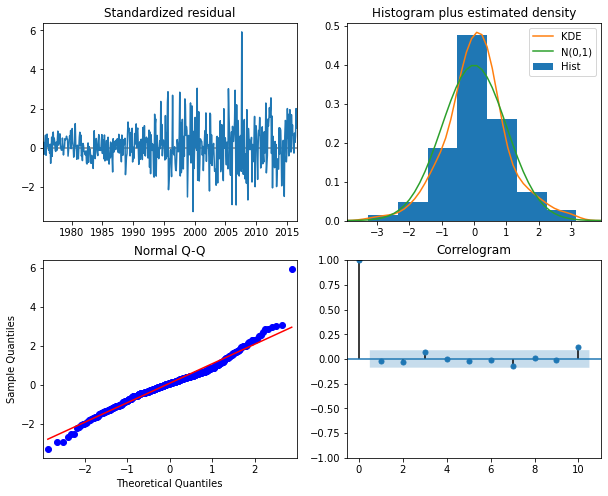

In [357]:
results.plot_diagnostics(figsize=(10, 8))
plt.show()

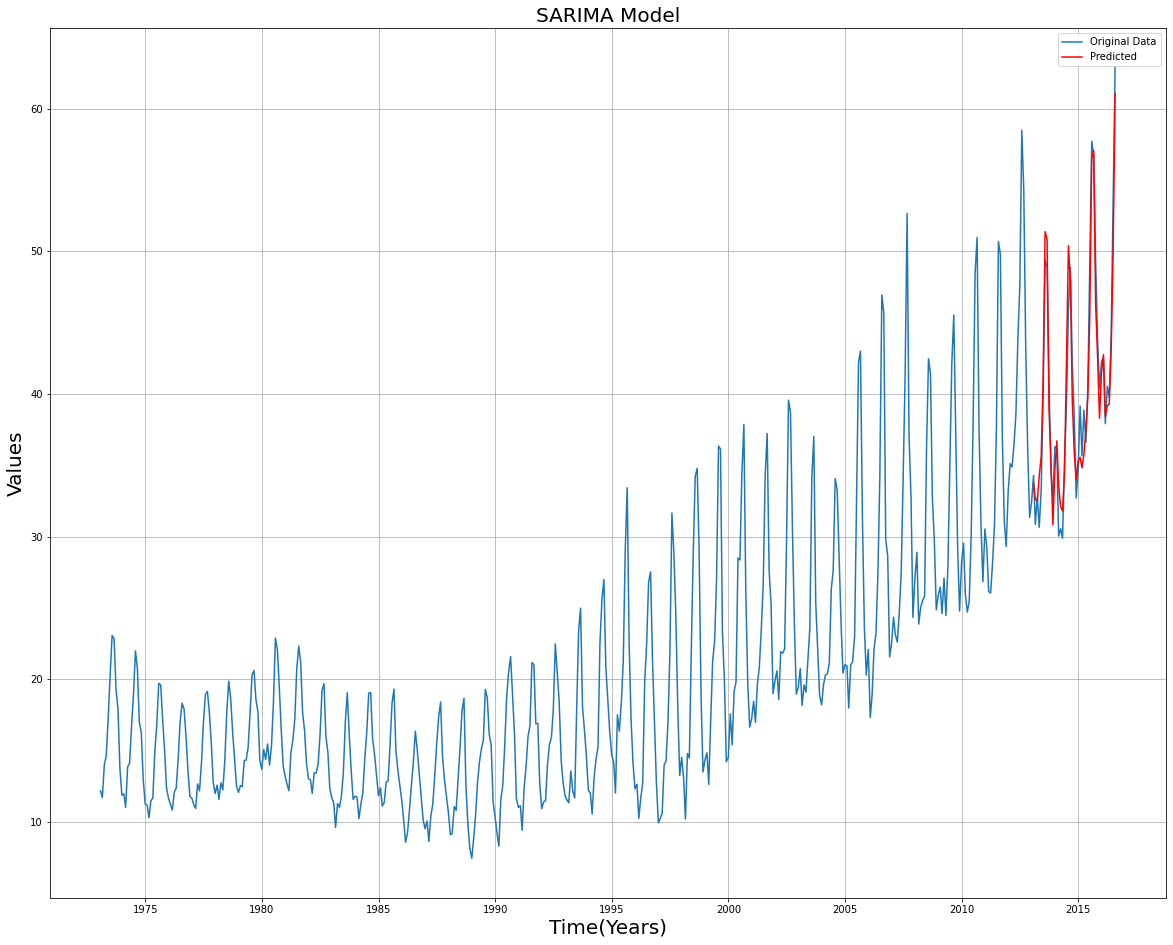

In [358]:
pred1 = results.predict(start = 480, end = 522)
plt.figure(figsize=(20,16))
plt.plot(mte, label = "Original Data")
plt.plot(pred1, label = "Predicted", color = "red")
plt.xlabel("Time(Years)",fontsize=20)
plt.ylabel("Values",fontsize=20)
plt.title("SARIMA Model", size = 20)
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [359]:
from sklearn.metrics import mean_squared_error
mte_truth=mte['2013-01-31':]
np.sqrt(mean_squared_error(mte_truth,pred1))

2.0235855161970293

###**Next 6 Years Forecasting**

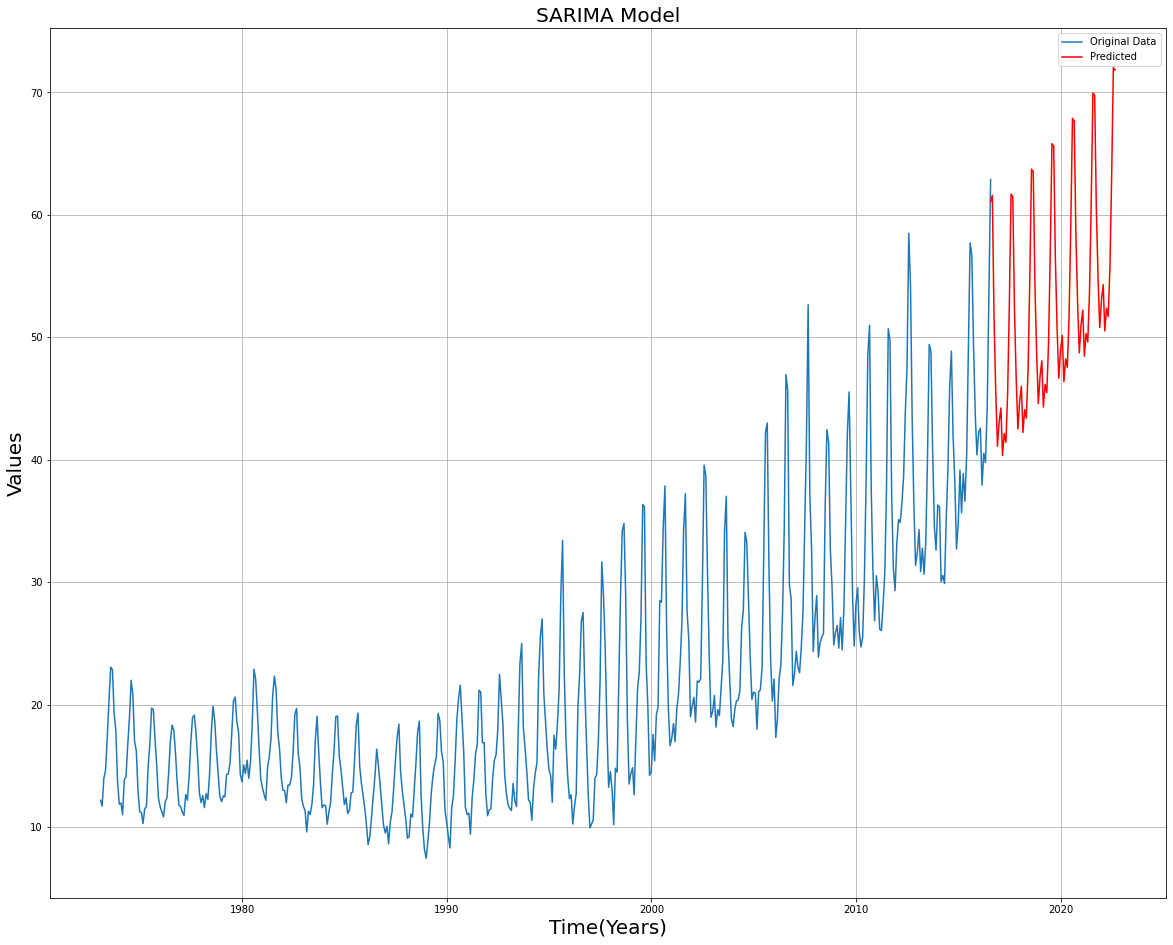

In [360]:
pred1 = results.predict(start = 522, end =595)
plt.figure(figsize=(20,16))
plt.plot(mte, label = "Original Data")
plt.plot(pred1, label = "Predicted", color = "red")
plt.xlabel("Time(Years)",fontsize=20)
plt.ylabel("Values",fontsize=20)
plt.title("SARIMA Model", size = 20)
plt.legend(loc="best")
plt.grid(True)
plt.show()

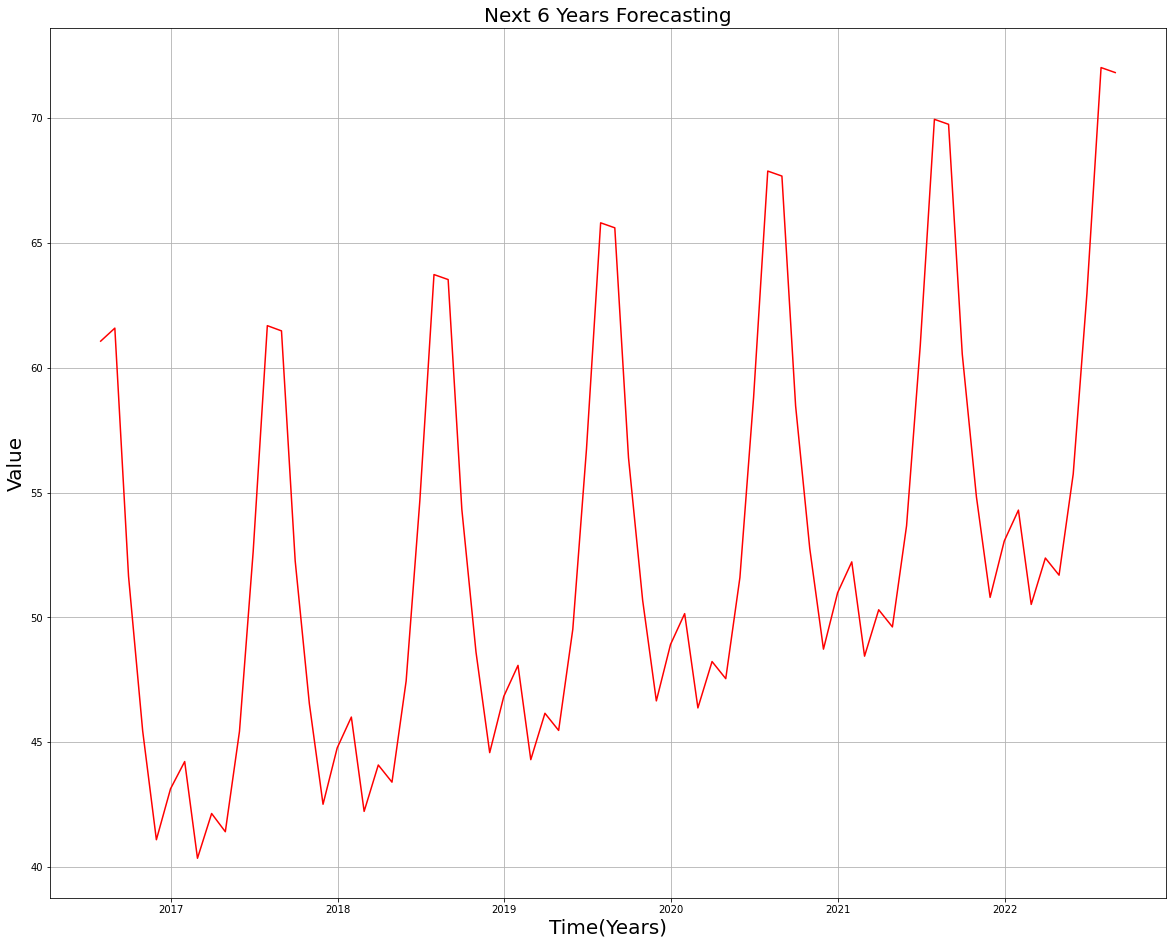

In [361]:
plt.figure(figsize = (20,16))
plt.plot(pred1, color = "red")
plt.title("Next 6 Years Forecasting", size = 20)
plt.xlabel("Time(Years)",fontsize=20)
plt.ylabel("Value",fontsize=20)
plt.grid(True)

###**Make the Dataset**

In [362]:
mte=mte.to_frame()
mte.head()

,Natural Gas Electric Power Sector CO2 Emissions
YYYYMM,
1973-01-31,12.175
1973-02-28,11.708
1973-03-31,13.994
1973-04-30,14.627
1973-05-31,17.344


Text(0.5, 1.0, 'Monthly Emission of CO2')

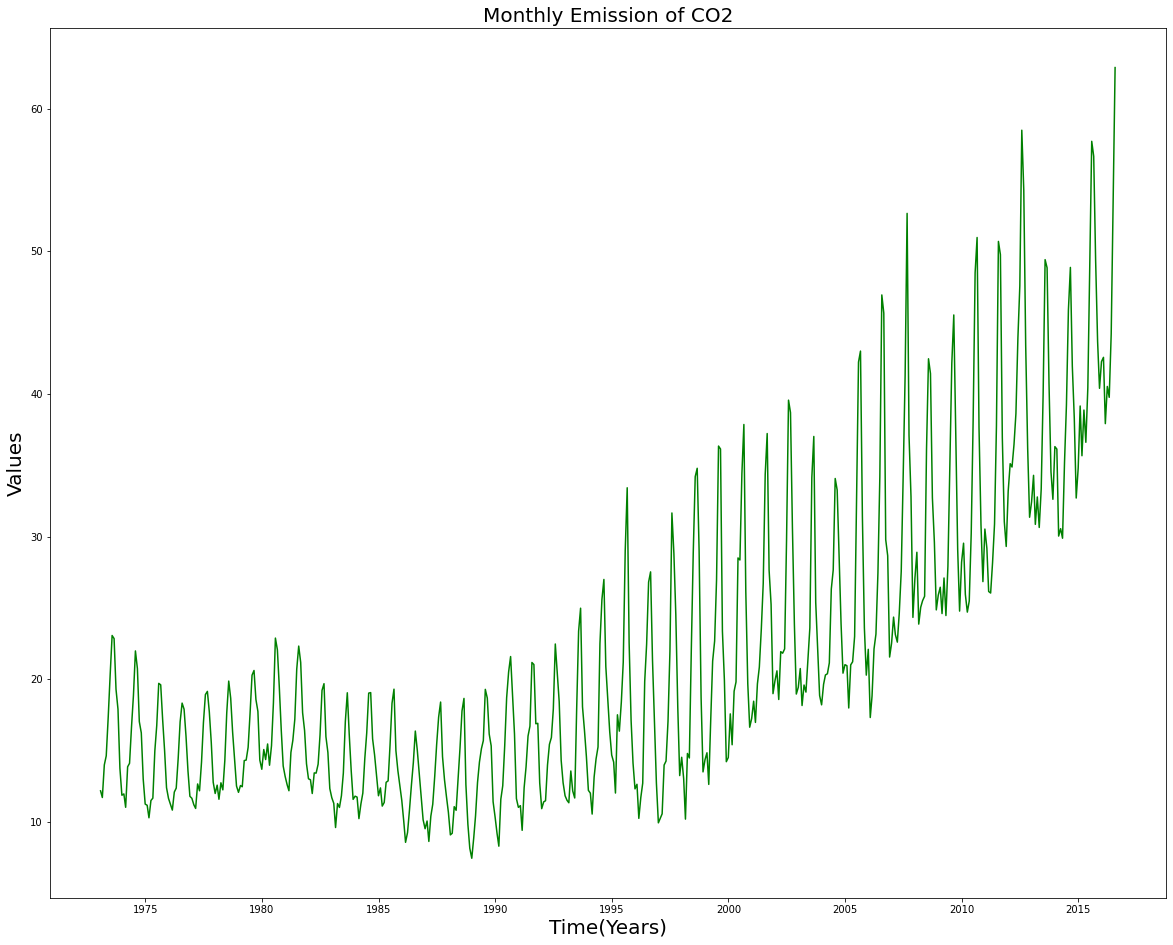

In [363]:
plt.figure(figsize=(20,16))
plt.plot(mte,color='green')
plt.xlabel('Time(Years)',fontsize=20)
plt.ylabel('Values',fontsize=20)
plt.title('Monthly Emission of CO2',fontsize=20)

In [364]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

###**Transform the Data Using MinMax Scaler**

In [365]:
scaler = MinMaxScaler(feature_range=(0, 1))
mte= scaler.fit_transform(mte)

###**Split the Dataset into Train and Test Dataset**

In [366]:
train_size = int(len(mte) * 0.8)
test_size = len(mte) - train_size
train, test = mte[0:train_size,:], mte[train_size:len(mte),:]
print(len(train), len(test))

418 105


Convert the Array of Values into Dataset Matrix

In [367]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [368]:
look_back=1
trainX,trainY=create_dataset(train,look_back)
testX,testY=create_dataset(test,look_back)

In [369]:
for i in range(5):
  print(trainX[i])


[0.08527411]
[0.07684953]
[0.1180885]
[0.12950769]
[0.17852182]


In [370]:
for i in range(5):
  print(trainY[i])

0.07684953006331968
0.11808850323814335
0.12950769397290424
0.1785218191330074
0.231216062634171


####**Reshape the Train and Test Dataset**

In [371]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

###**Building LSTM Model**

In [372]:
model = Sequential()
model.add(LSTM(3,activation='relu',input_shape=(1, look_back)))

model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
416/416 - 2s - loss: 0.0221 - 2s/epoch - 4ms/step
Epoch 2/100
416/416 - 1s - loss: 0.0142 - 961ms/epoch - 2ms/step
Epoch 3/100
416/416 - 1s - loss: 0.0127 - 986ms/epoch - 2ms/step
Epoch 4/100
416/416 - 1s - loss: 0.0110 - 950ms/epoch - 2ms/step
Epoch 5/100
416/416 - 1s - loss: 0.0092 - 968ms/epoch - 2ms/step
Epoch 6/100
416/416 - 1s - loss: 0.0076 - 970ms/epoch - 2ms/step
Epoch 7/100
416/416 - 1s - loss: 0.0062 - 955ms/epoch - 2ms/step
Epoch 8/100
416/416 - 1s - loss: 0.0053 - 985ms/epoch - 2ms/step
Epoch 9/100
416/416 - 1s - loss: 0.0047 - 975ms/epoch - 2ms/step
Epoch 10/100
416/416 - 1s - loss: 0.0045 - 969ms/epoch - 2ms/step
Epoch 11/100
416/416 - 1s - loss: 0.0044 - 946ms/epoch - 2ms/step
Epoch 12/100
416/416 - 1s - loss: 0.0043 - 958ms/epoch - 2ms/step
Epoch 13/100
416/416 - 1s - loss: 0.0043 - 939ms/epoch - 2ms/step
Epoch 14/100
416/416 - 1s - loss: 0.0043 - 949ms/epoch - 2ms/step
Epoch 15/100
416/416 - 1s - loss: 0.0043 - 967ms/epoch - 2ms/step
Epoch 16/100
416/416 -

In [373]:
trainpredict=model.predict(trainX)
testpredict=model.predict(testX)
trainpredict=scaler.inverse_transform(trainpredict)
testpredict=scaler.inverse_transform(testpredict)
trainY=scaler.inverse_transform([trainY])
testY=scaler.inverse_transform([testY])

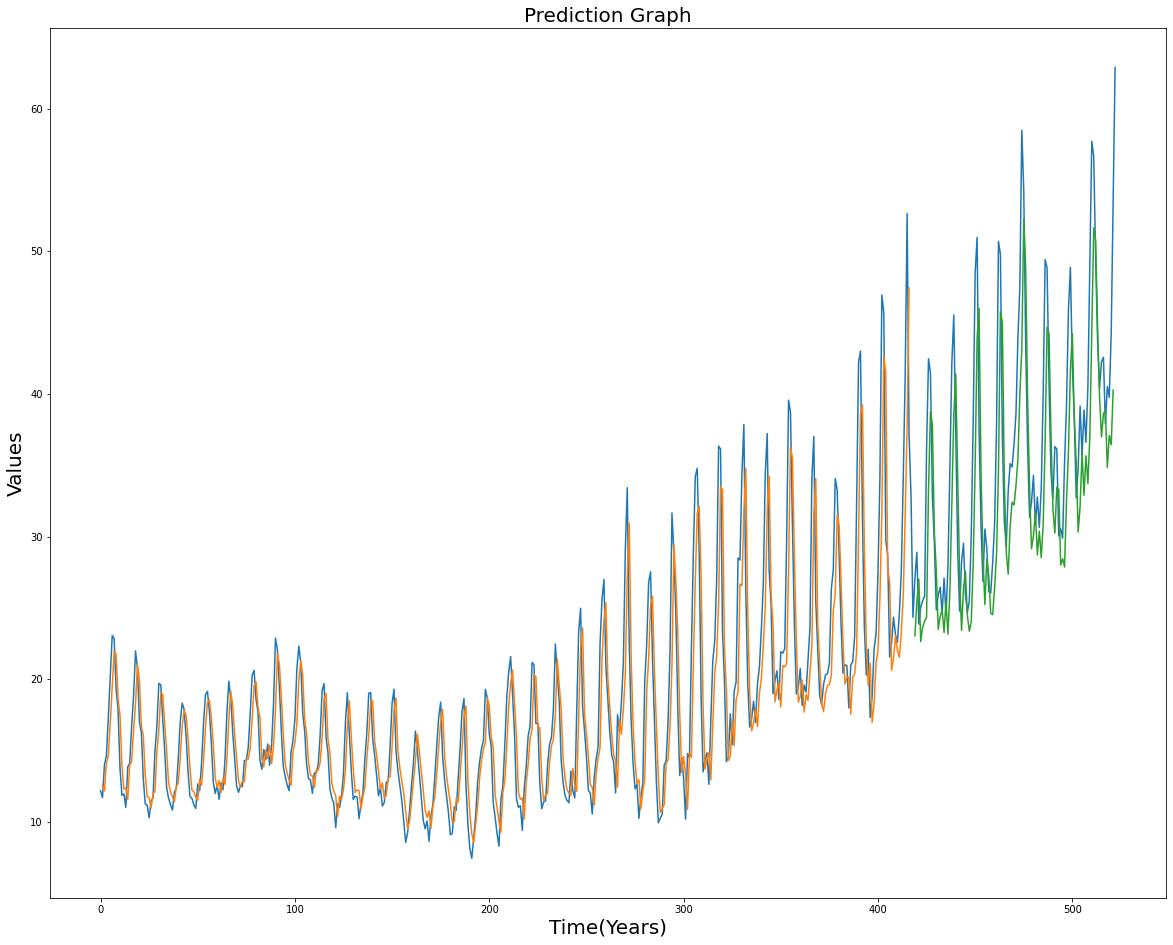

In [375]:
trainPredictPlot = numpy.empty_like(mte)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainpredict)+look_back, :] = trainpredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(mte)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainpredict)+(look_back*2)+1:len(mte)-1, :] = testpredict
# plot baseline and predictions
plt.figure(figsize=(20,16))
plt.plot(scaler.inverse_transform(mte))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.xlabel('Time(Years)',fontsize=20)
plt.ylabel('Values',fontsize=20)
plt.title('Prediction Graph',fontsize=20)
plt.show()